# Laboration - Covid-19

## Exercise 1. Covid-19 data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import json

### a) Initial analyses

In [8]:
covid19 = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=8)
covid19 #Exploring both head and tail at once

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


In [9]:
#There are no missing values (89 rows/weeks and 89 non-null values).
#The data type is either int64 or float64 and seems to be appropriately used.
covid19.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [10]:
covid19.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2020.460674,25.584270,13061.865169,126.011236,251.584270,4.885261e+05,4709.325843,88.606742,4261.741573,167.910112,16.233708,8923.303371,860.923595
std,0.501275,13.713637,14210.652869,137.184472,272.989003,4.559136e+05,4391.041264,83.646662,2609.965149,204.302952,19.765609,5126.703711,493.286226
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,2179.000000,21.000000,46.000000,7.279100e+04,705.000000,14.000000,2491.000000,17.000000,1.600000,5621.000000,544.299988
50%,2020.000000,25.000000,4608.000000,44.000000,100.000000,3.380260e+05,3273.000000,59.000000,3638.000000,82.000000,7.900000,8135.000000,787.700012
75%,2021.000000,36.000000,25405.000000,246.000000,485.000000,1.044862e+06,10067.000000,153.000000,7348.000000,235.000000,22.799999,14416.000000,1388.900024
max,2021.000000,53.000000,46177.000000,447.000000,869.000000,1.162506e+06,11200.000000,289.000000,7886.000000,664.000000,64.300003,14944.000000,1439.800049


In [11]:
covid19["år"].value_counts() #The data includes 48 weeks from 2020 and 41 weeks for 2021

2020    48
2021    41
Name: år, dtype: int64

### b) Create a "Vecka" column

In [12]:
covid19["veckonummer"] = covid19["år"].astype(str) + "v" + covid19["veckonummer"].astype(str) #Overwrites the "veckonummer" column, with info about year and week
covid19 = covid19.rename({"veckonummer":"Vecka"}, axis=1).drop("år", axis=1) #Renames the "veckonummer" column to "Vecka" and drops the year column

covid19.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


### c-f) Plot statistics

- Deceased per week
- New cases per week
- Deceased and new cases per week
- Cumulative cases

In [13]:
#Check maximum values (to be able to set the ticks for the y-axis)
print(f"Maximum number of cases per week: {covid19['Antal_fall_vecka'].max()}")
print(f"Maximum number of deceased per week: {covid19['Antal_avlidna_vecka'].max()}")
print(f"Total number of cases (from cumulative data): {covid19['Kum_antal_fall'].max()}")

Maximum number of cases per week: 46177
Maximum number of deceased per week: 664
Total number of cases (from cumulative data): 1162506


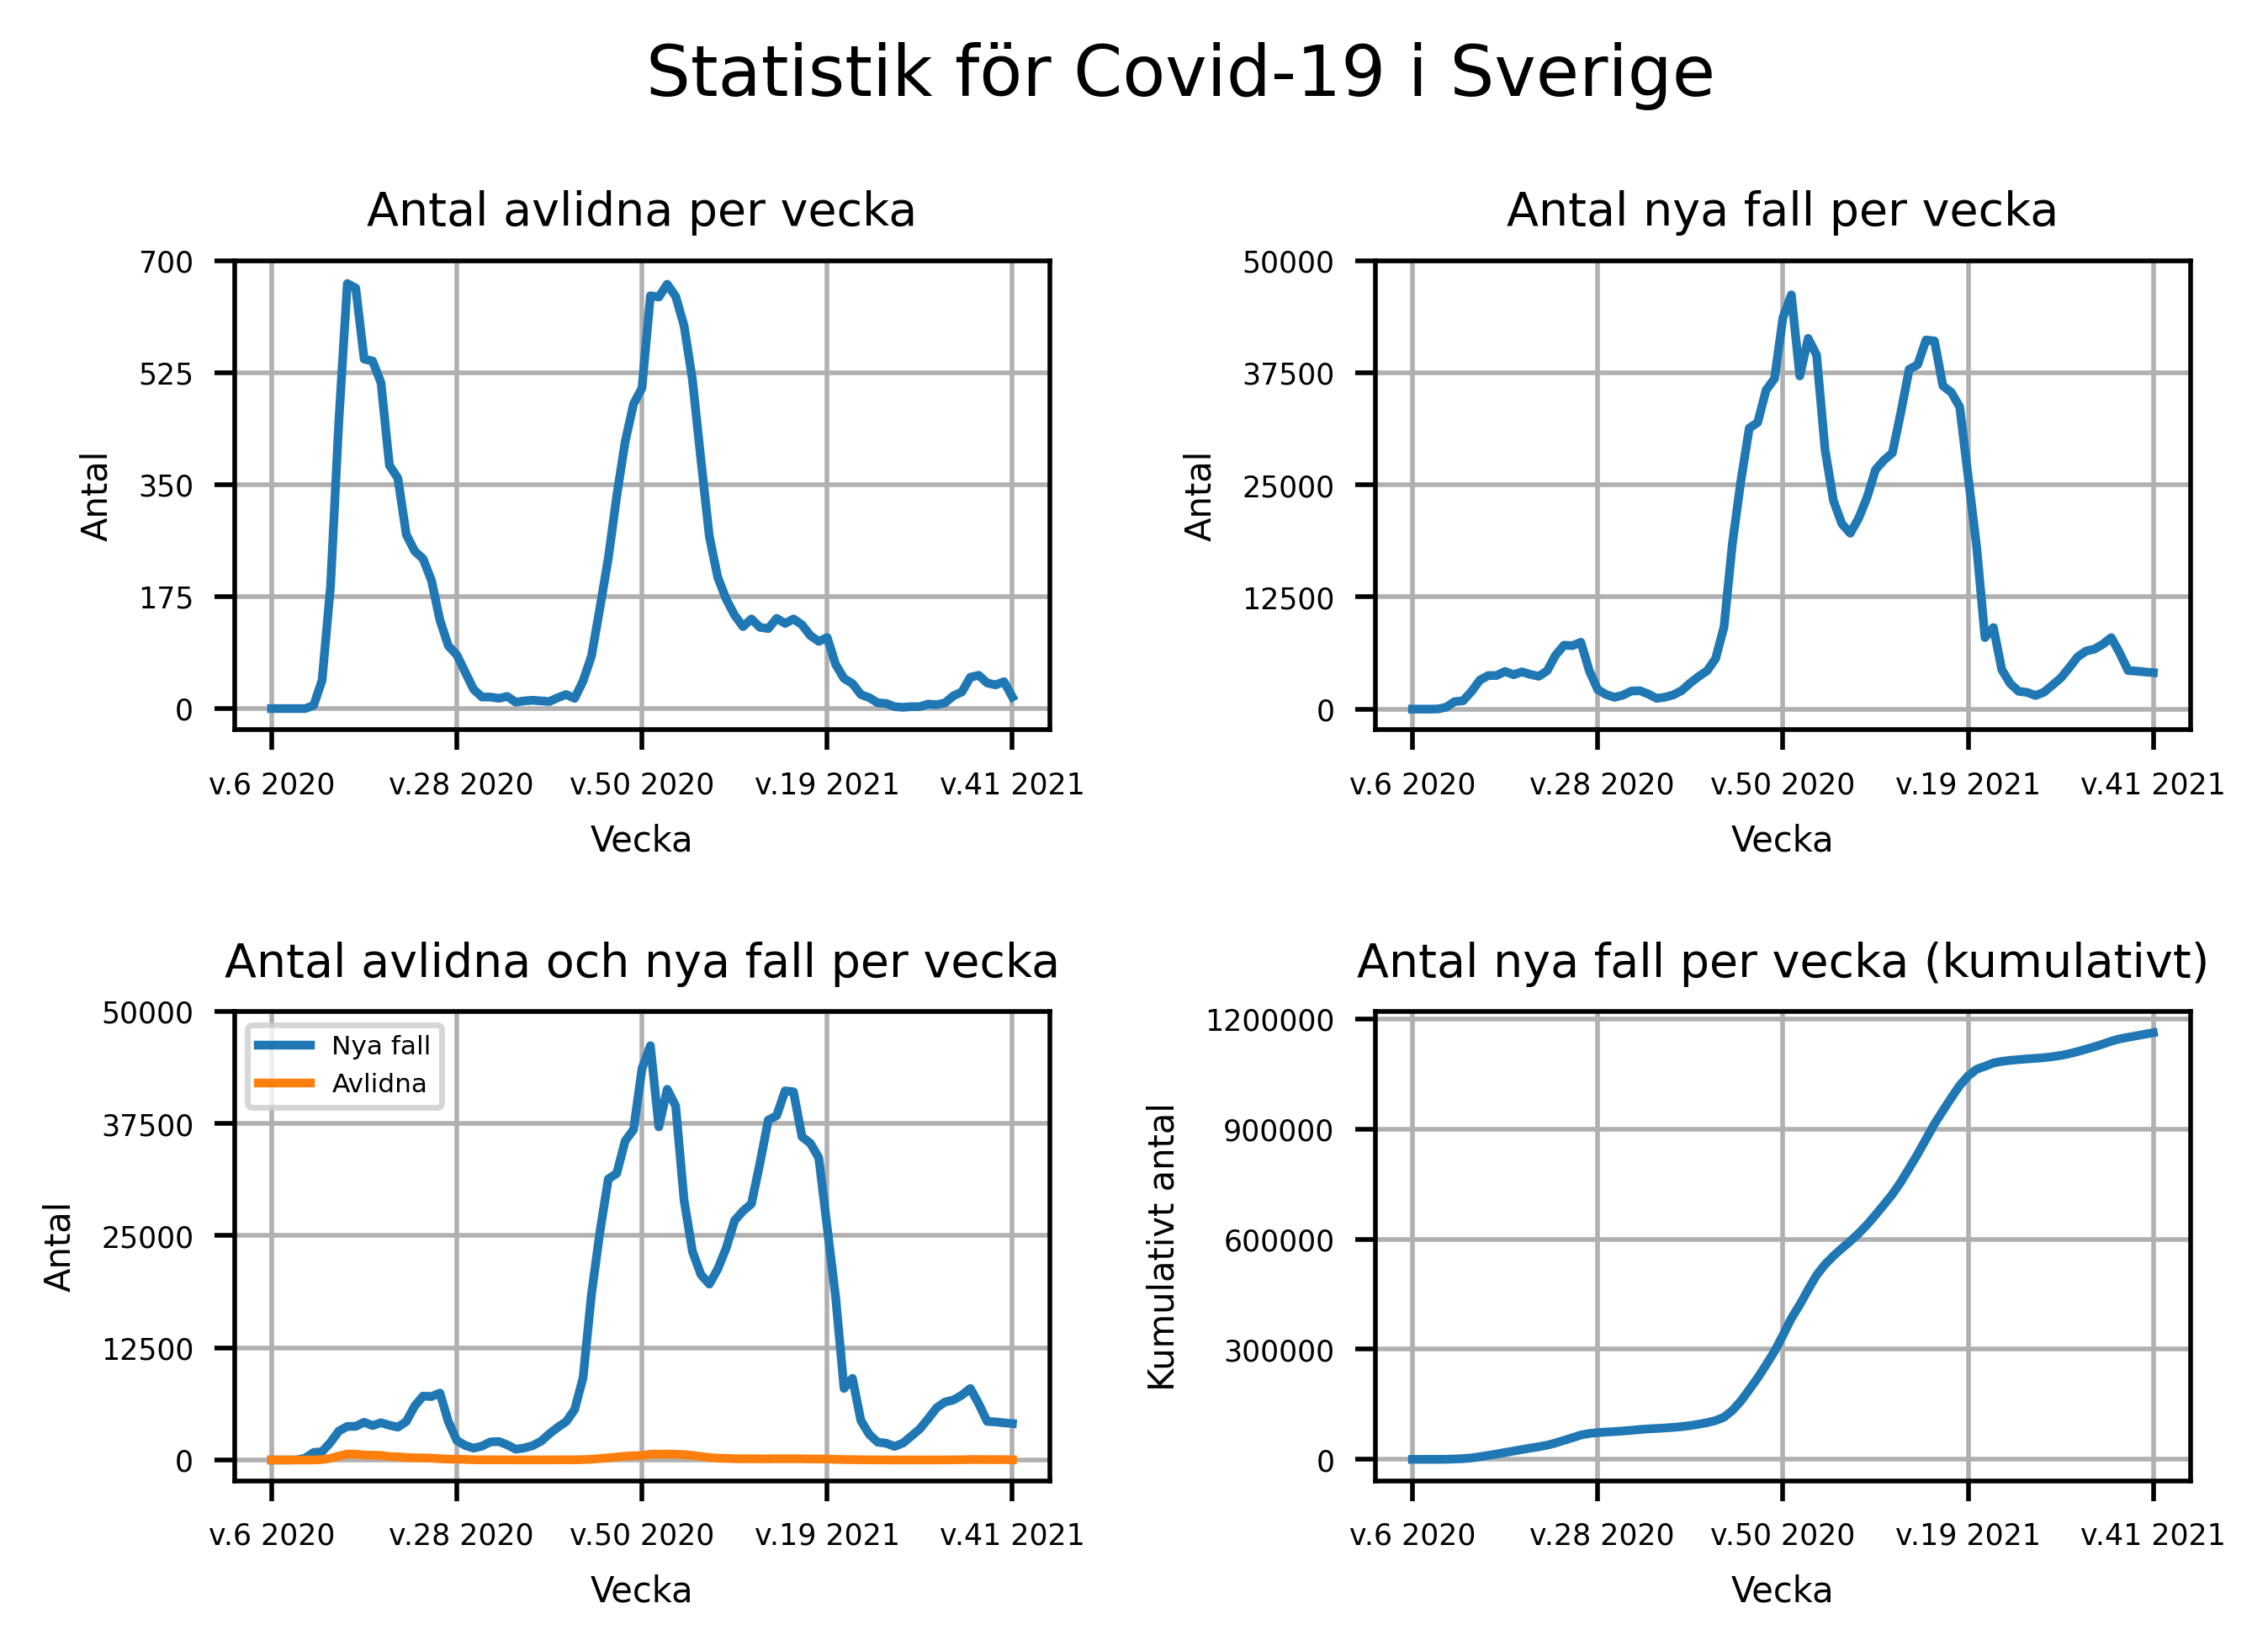

In [15]:
def set_plot_properties_seaborn(plot:sns.lineplot, title:str, y_label:str, y_tick_values:list) -> None:
    '''
    Sets the title, adjusts the ticks and changes the labels for the x and y-axis for a seaborn plot.
    
    Parameters
    ----------
    plot:sns.lineplot
        A seaborn (line)plot, with weeks between wk 6 2020 and wk 41 2021.
    title:str
        The title of the plot.
    y_label:str
        The label for the y-axis.
    y_tick_values:list
        The tick values for the y-axis.
    '''

    plot.set_title(title, size=8)
    plot.set_xticks([0, 22, 44, 66, 88])
    plot.set_xticklabels(["v.6 2020", " v.28 2020", "v.50 2020", "v.19 2021", "v.41 2021"], size=5)
    plot.set_yticks(y_tick_values)
    plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
    plot.set_xlabel("Vecka", size=6)
    plot.set_ylabel(y_label, size=6)
    plot.grid()
    
#Creates the figure for the subplots
fig, ax = plt.subplots(2,2, dpi=500, facecolor="white")
fig.subplots_adjust(wspace= .4, hspace=.6, top=.85) #Sets the space between plots and the space on top of the plot.
fig.suptitle("Statistik för Covid-19 i Sverige")

#Plots the first subplot
plot1 = sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka", ax=ax[0,0])
set_plot_properties_seaborn(plot1,"Antal avlidna per vecka", "Antal", [0, 175, 350, 525, 700])

#Plots the second subplot
plot2 = sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka", ax=ax[0,1])
set_plot_properties_seaborn(plot2, "Antal nya fall per vecka", "Antal", [0, 12500, 25000, 37500, 50000])

#Plots the third subplot
plot3 = sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka", ax=ax[1,0])
plot3 = sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka", ax=ax[1,0])
plot3.legend(labels=["Nya fall", "Avlidna"], fontsize=4.5, loc="upper left")
set_plot_properties_seaborn(plot3, "Antal avlidna och nya fall per vecka", "Antal", [0, 12500, 25000, 37500, 50000])

#Plots the forth subplot
plot4 = sns.lineplot(data=covid19, x="Vecka", y="Kum_antal_fall", ax=ax[1,1])
set_plot_properties_seaborn(plot4, "Antal nya fall per vecka (kumulativt)", "Kumulativt antal", [0, 300000, 600000, 900000, 1200000])

plt.savefig("Visualiseringar/statistics_for_covid-19_in_sweden.png")

In [22]:
def create_plotly_linefig(y_data1:str, y_label:str, title:str, y_data2:str=None, y_data1_legend_label:str=None, y_data2_legend_label:str=None) -> px.line:
        """
        Creates a plotly express line plot from the covid19 dataset, with weeks on the x-axis.
        
        Parameters
        ----------
        y_data1:str
                The name of the (first) column to be plotted on the y-axis.
        y_label:str
                The label for the y-axis.
        title:str
                The title of the plot.
        y_data2:str
                The name of the second column to be plotted on the y-axis (default None).
        y_data1_legend_label:str
                The name of the first y-data, to be shown in the legend (default None).
        y_data2_legend_label:str
                The name of the second y-data, to be shown in the legend (default None).     
        
        Returns
        -------
        A plotly express lineplot figure.
        """

        #Creates a list of labels for the ticks (every other week)
        tick_labels = [f"v.{i} 2020" for i in range(6, 54, 2)]
        tick_labels.extend([f"v.{i} 2021" for i in range(1, 42, 2)])

        #Creates a list of the real values (every other week)
        real_labels = [f"2020v{i}" for i in range(6, 54, 2)]
        real_labels.extend([f"2021v{i}" for i in range(1, 42, 2)])

        #Creates labels for hover (all weeks)
        hover_labels = [f"v.{i} 2020" for i in range(6, 54)]
        hover_labels.extend([f"v.{i} 2021" for i in range(1, 42)])

        #Creates a template to be used in the hover
        #It receives customdata in update_traces and receives the y_data from the y-parameter in the created figure
        hover_template = '<br>%{customdata}<br>Antal personer: %{y}<br><extra></extra>' #<extra></extra> removes the secondary box. Reference: https://community.plotly.com/t/remove-trace-0-next-to-hover/33731
        
        #Creates the figure
        if y_data2 == None:
                fig = px.line(covid19, x="Vecka", y=y_data1, title=title)
                fig.update_layout(showlegend=False) #Removes the legend
        else:
                fig = px.line(covid19, 
                                x="Vecka", 
                                y=[y_data1, y_data2], 
                                title=title,
                                hover_data={"Vecka":False, y_data1:False, y_data2:False} #Removes all information about the data from the hover/legend)
                                )
                #Adds the two lines in one plot and sets the names that will be shown in the legend.
                fig.add_trace(go.Scatter(x=covid19["Vecka"], y=covid19[y_data1], name=y_data1_legend_label))
                fig.add_trace(go.Scatter(x=covid19["Vecka"], y=covid19[y_data2], name=y_data2_legend_label))

        #Customise hover
        fig.update_traces(customdata=hover_labels, hovertemplate=hover_template, mode="markers+lines")

        #Sets the label of the y-axis and the ticks for the x-axis
        fig.update_layout(
                yaxis=dict(title=y_label),
                xaxis = dict(tickmode = "array", 
                        tick0 = 0, 
                        dtick = 2, #Show every other tick/week
                        ticktext=tick_labels, #The tick_labels (created above) should be shown
                        tickvals=real_labels #These are the old values that should be overwritten in the plot
                        ))

        return fig

In [23]:
plot1 = create_plotly_linefig("Antal_avlidna_vecka", "Antal", "Avlidna i covid-19 i Sverige (per vecka)")
plot1.show()
plot1.write_html("Visualiseringar/deceased_per_week.html")

In [24]:
plot2 = create_plotly_linefig("Antal_fall_vecka", "Antal", "Nya fall av covid-19 i Sverige (per vecka)")
plot2.show()
plot2.write_html("Visualiseringar/new_cases_per_week.html")

In [25]:
plot3 = create_plotly_linefig("Antal_avlidna_vecka", "Antal", "Avlidna och nya fall av covid-19 i Sverige (per vecka)", "Antal_fall_vecka", "Avlidna", "Nya fall")
plot3.show()
plot3.write_html("Visualiseringar/deceased_and_new_cases.html")

In [30]:
plot4 = create_plotly_linefig("Kum_antal_fall", "Kumulativt antal", "Nya fall av covid-19 i Sverige per vecka (kumulativt)")
plot4.show()
plot4.write_html("Visualiseringar/cumulative_cases.html")

## Exercise 2. Vaccination Data

In [28]:
vaccination = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=5)
vaccination

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,671,450,0.598039,0.401070
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4174,3324,0.649347,0.517113
2,1,Stockholm,114,Upplands Väsby,30-39,7088,4976,4341,0.702032,0.612444
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5308,5010,0.780359,0.736548
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5360,5190,0.866613,0.839127
...,...,...,...,...,...,...,...,...,...,...
2605,25,Norrbotten,2584,Kiruna,50-59,3134,2911,2852,0.928845,0.910019
2606,25,Norrbotten,2584,Kiruna,60-69,2768,2596,2537,0.937861,0.916546
2607,25,Norrbotten,2584,Kiruna,70-79,2287,2160,2074,0.944469,0.906865
2608,25,Norrbotten,2584,Kiruna,80-89,1280,1233,1157,0.963281,0.903906


### a) Number of "län" in the data

In [ ]:
print(f"There are {len(vaccination['Län_namn'].unique())} 'län' in the dataset.")

### b) Number of "kommuner" in the dataset.

In [ ]:
print(f"There are {len(vaccination['Kommun_namn'].unique())} 'kommuner' in the dataset.")

### c) Number of people that are are represented in the data.

In [ ]:
no_people_represented = sum(vaccination['Befolkning'])
print(f"There are {no_people_represented} people represented in the data")

### d) Number of children, under the age of 16.

In [ ]:
print(f"There are about {10427296-no_people_represented} children (under the age of 16) in Sweden.") 

### e) Bar chart for number of people vaccinated with at least one dose and fully vaccinated people (two plots)

In [ ]:
#Creates a new dataframe to be used for plotting vaccination for each "län"
vaccination_summed = pd.DataFrame(vaccination["Antal färdigvaccinerade"].groupby(vaccination["Län_namn"]).sum())
vaccination_summed["Antal minst 1 dos"] = vaccination["Antal minst 1 dos"].groupby(vaccination["Län_namn"]).sum()
vaccination_summed["Andel färdigvaccinerade"] = vaccination["Andel färdigvaccinerade"].groupby(vaccination["Län_namn"]).mean()*100
vaccination_summed["Andel minst 1 dos"] = vaccination["Andel minst 1 dos"].groupby(vaccination["Län_namn"]).mean()*100
vaccination_summed

In [ ]:
#Creates a template to be shown in hover
def create_plotly_barfig(y_data1:str, title:str, y_data2:str=None) -> px.bar:
        """
        Creates a plotly express bar plot from the vaccination dataset.
        
        Parameters
        ----------
        y_data1:str
                The name of the first column to be plotted on the y-axis.
        title:str
                The title of the plot.
        y_data2:str
                The name of the second column to be plotted on the y-axis (default None).    
        
        Returns
        -------
        A plotly express barplot figure.
        """        

        if y_data2 == None:
                fig = px.bar(
                        vaccination_summed, 
                        x=vaccination_summed.index,      
                        y=y_data1,
                        title=title,
                        labels={"Län_namn":"Län"}
                        )
        else:
                fig = px.bar(
                        vaccination_summed, 
                        x=vaccination_summed.index, 
                        y=[y_data1, y_data2], 
                        barmode="group",
                        title=title,
                        labels={"Län_namn":"Län", "value":"Antal vaccinerade", "variable":"Variabel"}
                        )
        if y_data1 == "Andel minst 1 dos" or y_data1 == "Andel färdigvaccinerade":
                fig.update_layout(
                        yaxis=dict(title="Andel (%)"), 
                        xaxis=dict(title="Län"),
                        )
        else:
                fig.update_layout(
                        yaxis=dict(title="Antal"), 
                        xaxis=dict(title="Län"),
                        )

        return fig      

In [ ]:
plot5 = create_plotly_barfig("Andel minst 1 dos", "Andel vaccinerade med minst en dos (per län)")
plot5.show()

In [ ]:
plot6 = create_plotly_barfig("Andel färdigvaccinerade", "Andel färdigvaccinerade (per län)")
plot6.show()

### f) Bar chart for number of people vaccinated with at least one dose and fully vaccinated people (one plot)

In [ ]:
plot7 = create_plotly_barfig("Antal minst 1 dos", "Antal vaccinerade med minst en dos och antal färdigvaccinerade", "Antal färdigvaccinerade")
plot7.show()

TODO: Save all the plots to html and rename them

## Exercise 3. KPI

I have identified the following six KPI:s (where all, except the last one, are on a national level):
1. The number of deceased should decrease when the number of vaccinated people increase.
2. The number of covid-19 cases should decrease when the number of vaccinated people increase.
3. The number of people in intensive care units should decrease when the number of vaccinated people increase.
4. The majority of people receiving their first dose should also receive their second dose.
5. The vaccination distribution order should generally be followed (i.e. from the oldest to the youngest).
6. The number of covid-19 cases (per 10,000 inhabitants) should not differ significantly between the different neighbourhoods in Gothenburg.

### KPI 1. The number of deceased should decrease when the number of vaccinated people increase

- One of the main goals with vaccination is that the vaccination should decrease the death rate. This is the first KPI I have identified. I will examine this exploratory, by plotting the relationship between the number of deceased and the number of vaccinated people.
- However, I first start with reading in the data and creating a new dataframe.

In [64]:
vaccination_swe = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=0)
vaccination_swe #"Antal vaccinationer" is cumulatative

,Vecka,År,Region,Antal vaccinationer
0,52,2020,| Sverige |,2472
1,52,2020,Stockholm,288
2,52,2020,Uppsala,8
3,52,2020,Södermanland,116
4,52,2020,Östergötland,214
...,...,...,...,...
941,41,2021,Gävleborg,400931
942,41,2021,Västernorrland,353992
943,41,2021,Jämtland,187873
944,41,2021,Västerbotten,403377


In [65]:
vaccination_swe.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Vecka                946 non-null    int64 
 1   År                   946 non-null    int64 
 2   Region               946 non-null    object
 3   Antal vaccinationer  946 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 29.7+ KB


In [66]:
#Create a "Vecka" column and overwrite/drop the old values
vaccination_swe["Vecka"] = "v." + vaccination_swe["Vecka"].astype(str) + " " + vaccination_swe["År"].astype(str) 
vaccination_swe = vaccination_swe.drop("År", axis=1) 
vaccination_swe

,Vecka,Region,Antal vaccinationer
0,v.52 2020,| Sverige |,2472
1,v.52 2020,Stockholm,288
2,v.52 2020,Uppsala,8
3,v.52 2020,Södermanland,116
4,v.52 2020,Östergötland,214
...,...,...,...
941,v.41 2021,Gävleborg,400931
942,v.41 2021,Västernorrland,353992
943,v.41 2021,Jämtland,187873
944,v.41 2021,Västerbotten,403377


In [67]:
#Pick out Sweden from region and remove the region column
vaccination_swe = vaccination_swe.loc[(vaccination_swe["Region"] == "| Sverige |")].reset_index(drop=True)
vaccination_swe = vaccination_swe.drop(labels="Region", axis=1)
vaccination_swe.head()

,Vecka,Antal vaccinationer
0,v.52 2020,2472
1,v.53 2020,16529
2,v.1 2021,52934
3,v.2 2021,132235
4,v.3 2021,244991


In [68]:
covid19_to_merge = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=8)
covid19_to_merge["veckonummer"] = "v." + covid19_to_merge["veckonummer"].astype(str) + " " + covid19_to_merge["år"].astype(str)
covid19_to_merge = covid19_to_merge.rename({"veckonummer":"Vecka"}, axis=1).drop("år", axis=1)
covid19_to_merge.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,v.6 2020,1,0,0,1,0,0,0,0,0.0,0,0.0
1,v.7 2020,0,0,0,1,0,0,0,0,0.0,0,0.0
2,v.8 2020,0,0,0,1,0,0,0,0,0.0,0,0.0
3,v.9 2020,13,0,0,14,0,0,0,0,0.0,0,0.0
4,v.10 2020,211,2,2,225,2,3,3,0,0.0,0,0.0


In [69]:
covid19_vaccination_merged = pd.merge(vaccination_swe, covid19_to_merge[["Vecka", "Antal_fall_vecka", "Antal_nyaintensivvårdade_vecka", "Antal_avlidna_vecka"]], on="Vecka", how="left")
covid19_vaccination_merged.head()

,Vecka,Antal vaccinationer,Antal_fall_vecka,Antal_nyaintensivvårdade_vecka,Antal_avlidna_vecka
0,v.52 2020,2472,37134,206,643
1,v.53 2020,16529,41323,234,663
2,v.1 2021,52934,39455,185,644
3,v.2 2021,132235,28942,153,598
4,v.3 2021,244991,23230,125,513


In [70]:
covid19_vaccination_merged.tail()

,Vecka,Antal vaccinationer,Antal_fall_vecka,Antal_nyaintensivvårdade_vecka,Antal_avlidna_vecka
38,v.37 2021,13397681,6266,24,52
39,v.38 2021,13581182,4298,21,40
40,v.39 2021,13734960,4241,17,37
41,v.40 2021,13876097,4141,15,42
42,v.41 2021,14066584,4062,10,18


It is now time to plot the data, and I choose to do this with a regplot, since I expect the relationship to be linear. The line shown is the regression line, with the shaded part being the 95% confident interval. 

Text(0.5, 1.0, 'Antal avlidna ')

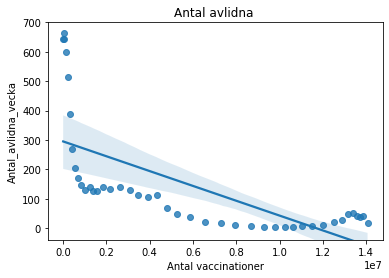

In [76]:
fig = sns.regplot(data=covid19_vaccination_merged, x="Antal vaccinationer", y="Antal_avlidna_vecka")
_ = fig.set(ylim=(-40, 700))
fig.set_title("Antal avlidna ")

In the plot above we can see that the number of people who dies from covid-19 decreases when the number of vaccinated people increases ("antal vaccinationer" is the cumulative value). The relationship is not entirely linear (although there is a linear trend), but the number of deceased decreases fastest at the beginning. This effect could be due to the fact that the first people who got vaccinated was the elderly, other people in risk groups and the people who took care of them. 

### KPI 2. The number of covid-19 cases should decrease when the number of vaccinated people increase

- We investigate this by plotting the number of vaccinations against the number of cases.


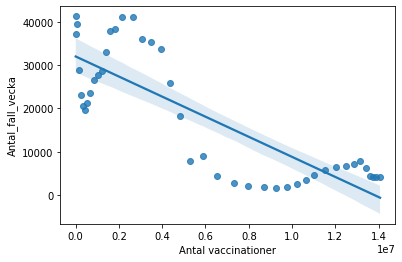

In [57]:
fig = sns.regplot(data=covid19_vaccination_merged, x="Antal vaccinationer", y="Antal_fall_vecka")

The graph above shoves a curvilinear relationship, but the trend is that the cases per week decreases when more people are vaccinated. This plot depicts the second wave of covid-19 (see data) and the number of cases are propably explained by several other factors than the number of vaccination (for example restrictions, weather etc.).

### KPI 3. The number of people in intensive care units should decrease when the number of vaccinated people increase

- We investigate this by plotting the number of vaccinations against the number of people in intensive care.

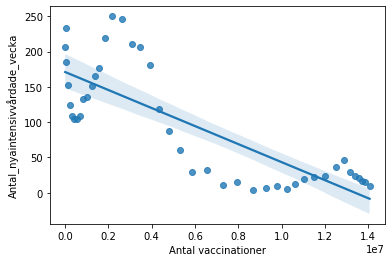

In [58]:
fig = sns.regplot(data=covid19_vaccination_merged, x="Antal vaccinationer", y="Antal_nyaintensivvårdade_vecka")

The graph above shoves a curvilinear relationship, but the trend is that the cases per week decreases when more people are vaccinated. This plot depicts the second wave of covid-19 (see data) and the number of cases are propably explained by several other factors than the number of vaccination (for example restrictions, weather etc.)

This plot shows a similar trend as the plot for the number of cases. This is interesting, since we would also expect a larger drop of the number of people in intensive care in the beginning, because people in risk groups (who got vaccinated early) are more likely to end up in intensive care if infected. However, a lot of elderly people with covid-19 died at home and were never in intensive care.

### KPI 4. The majority of people receiving their first dose should also receive their second dose.

In [54]:
vaccination_one_dose_or_fully = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=1)

vaccination_one_dose_or_fully["Vecka"] = "v." + vaccination_one_dose_or_fully["Vecka"].astype(str) + " " + vaccination_one_dose_or_fully["År"].astype(str)
vaccination_one_dose_or_fully = vaccination_one_dose_or_fully.drop("År", axis=1)
vaccination_one_dose_or_fully 

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,v.52 2020,| Sverige |,2472,0.000289,Minst 1 dos
1,v.52 2020,| Sverige |,0,0.000000,Färdigvaccinerade
2,v.52 2020,Stockholm,288,0.000148,Minst 1 dos
3,v.52 2020,Stockholm,0,0.000000,Färdigvaccinerade
4,v.52 2020,Uppsala,8,0.000025,Minst 1 dos
...,...,...,...,...,...
1887,v.41 2021,Jämtland,90406,0.829771,Färdigvaccinerade
1888,v.41 2021,Västerbotten,206223,0.907891,Minst 1 dos
1889,v.41 2021,Västerbotten,196346,0.864408,Färdigvaccinerade
1890,v.41 2021,Norrbotten,188604,0.893312,Minst 1 dos


In [55]:
vaccination_one_dose_or_fully = vaccination_one_dose_or_fully.loc[vaccination_one_dose_or_fully["Region"] == "| Sverige |"].reset_index(drop=True)
vaccination_one_dose_or_fully

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,v.52 2020,| Sverige |,2472,2.894106e-04,Minst 1 dos
1,v.52 2020,| Sverige |,0,0.000000e+00,Färdigvaccinerade
2,v.53 2020,| Sverige |,16524,1.934556e-03,Minst 1 dos
3,v.53 2020,| Sverige |,5,5.853775e-07,Färdigvaccinerade
4,v.1 2021,| Sverige |,52923,6.195986e-03,Minst 1 dos
...,...,...,...,...,...
81,v.39 2021,| Sverige |,6565538,7.686636e-01,Färdigvaccinerade
82,v.40 2021,| Sverige |,7188487,8.415957e-01,Minst 1 dos
83,v.40 2021,| Sverige |,6673535,7.813074e-01,Färdigvaccinerade
84,v.41 2021,| Sverige |,7212619,8.444209e-01,Minst 1 dos


In [60]:
vaccination_one_dose_or_fully.iloc[43]

Vecka                         v.20 2021
Region                      | Sverige |
Antal vaccinerade               1149443
Andel vaccinerade              0.134572
Vaccinationsstatus    Färdigvaccinerade
Name: 43, dtype: object

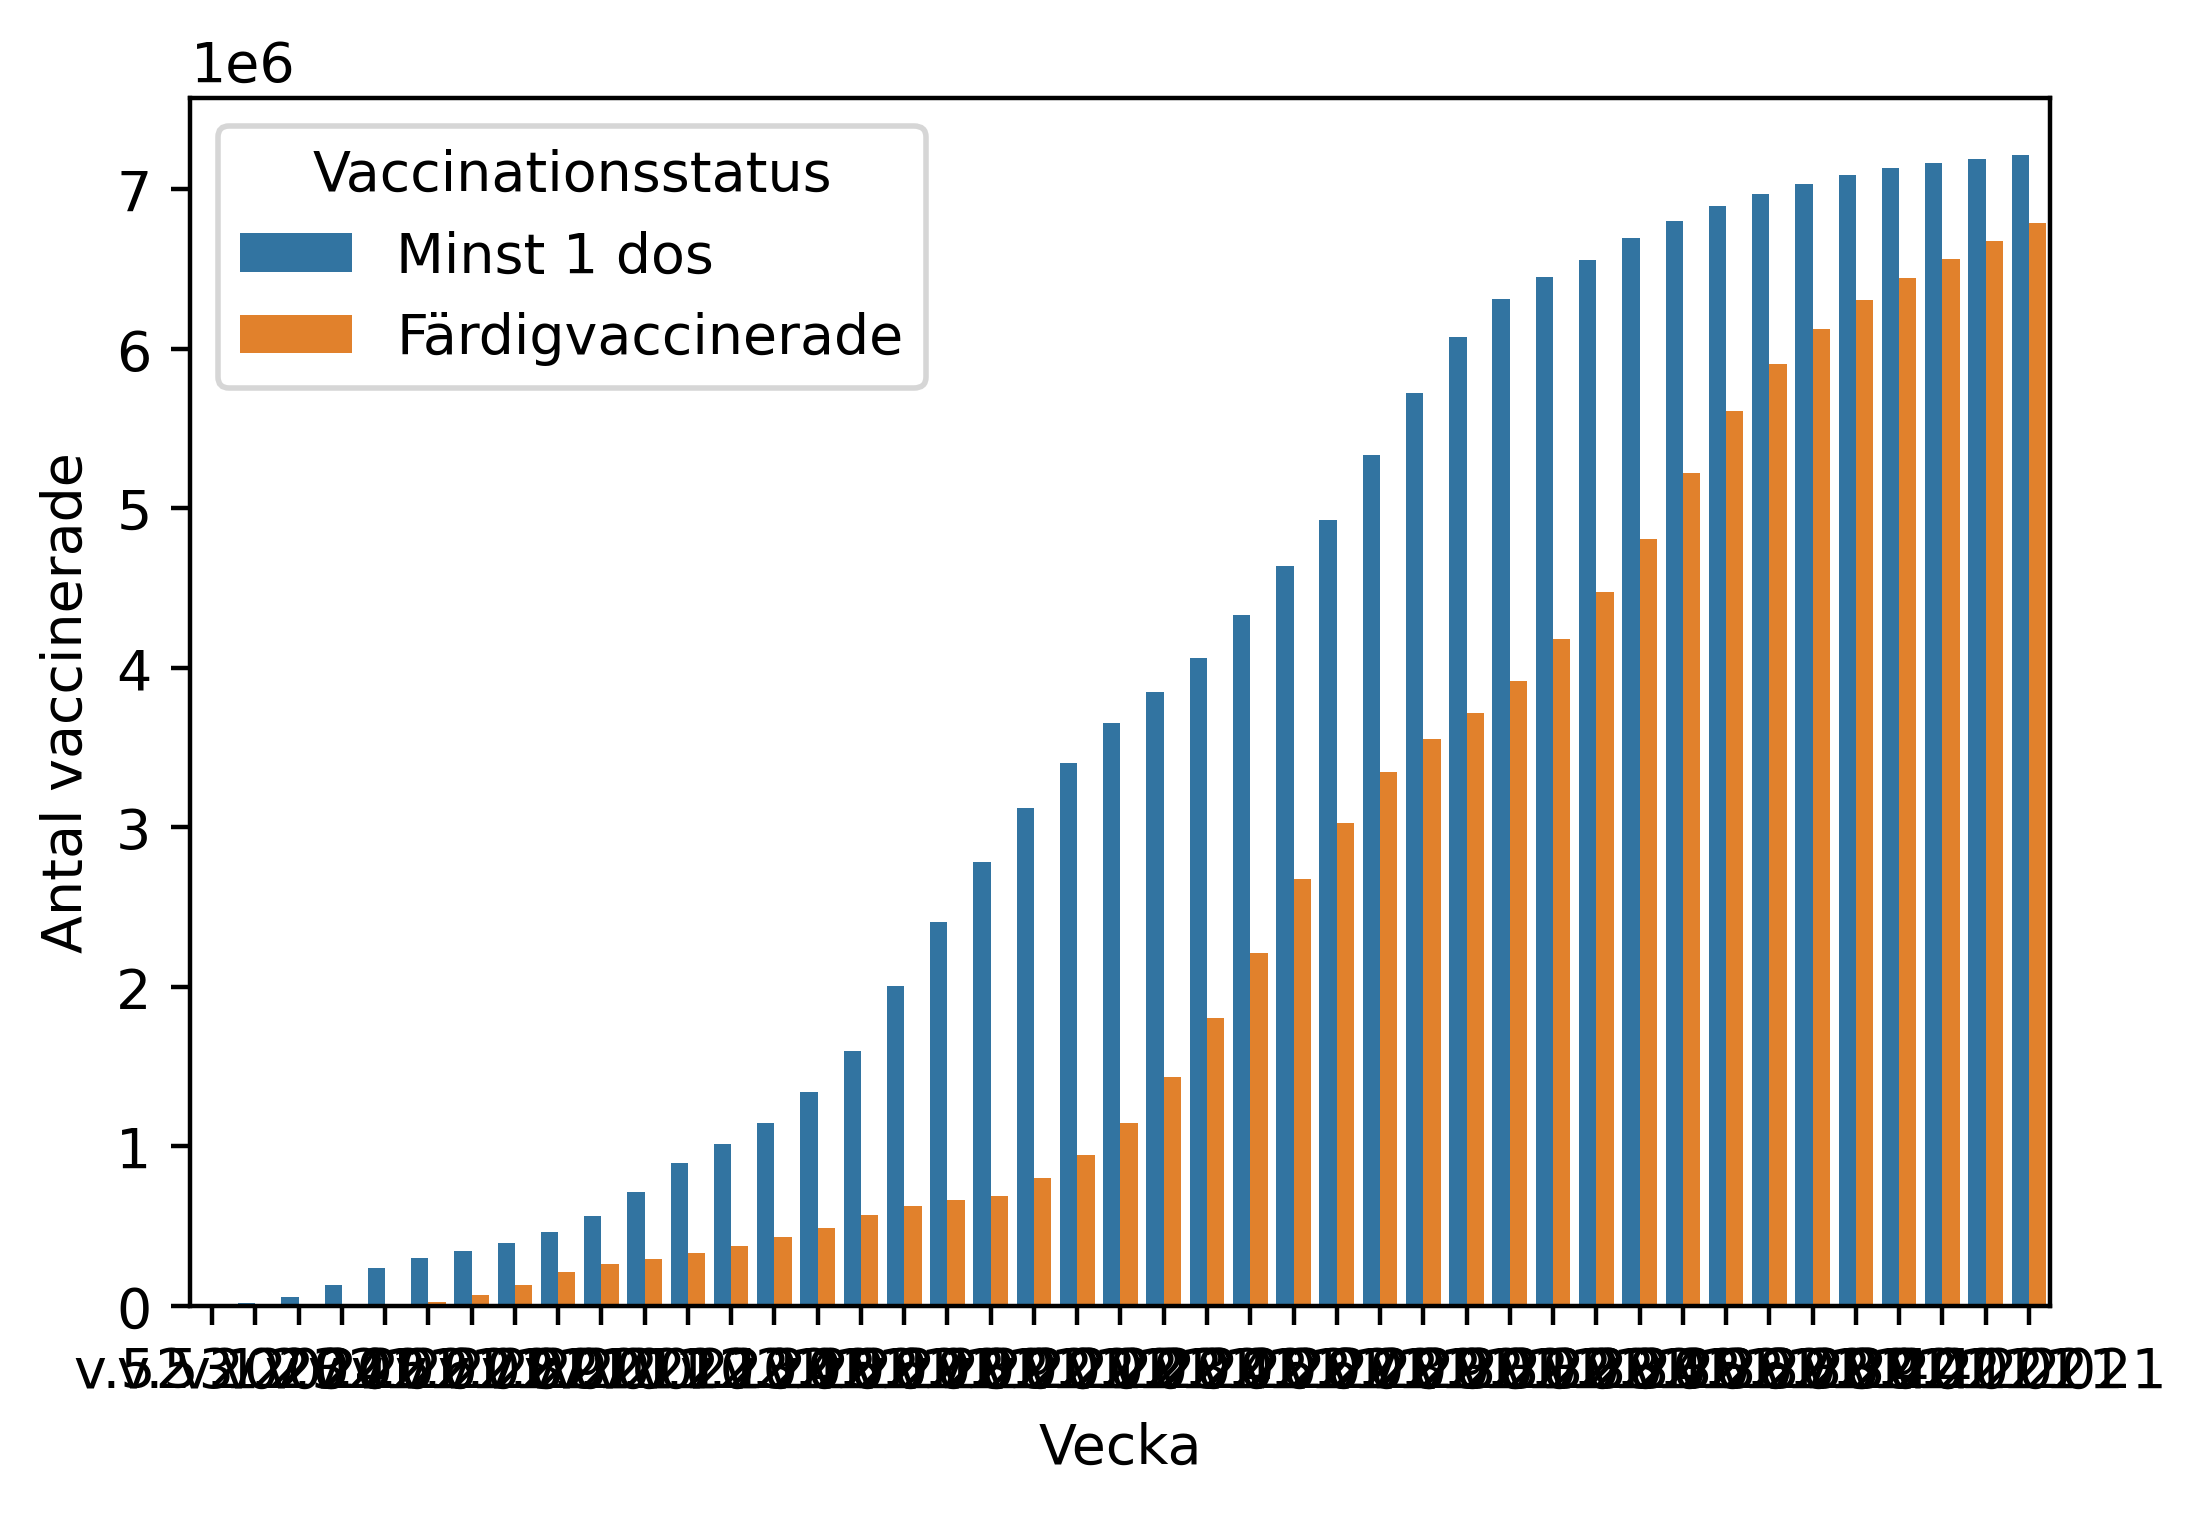

In [62]:
plt.figure(dpi=400)
plot1 = sns.barplot(data=vaccination_one_dose_or_fully, x="Vecka", y="Antal vaccinerade", hue="Vaccinationsstatus")
plot1.set_xticklabels("v52. 2020", "v.20 2021", "v.41 2021")

### KPI 5. The vaccination distribution order should generally be followed (i.e. from the oldest to the youngest).


In [24]:
vaccination_age = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=2, usecols=[0, 1, 3, 4])
vaccination_age

,Region,Åldersgrupp,Andel vaccinerade,Vaccinationsstatus
0,| Sverige |,12-15,0.124423,Minst 1 dos
1,| Sverige |,16-17,0.697477,Minst 1 dos
2,| Sverige |,18-29,0.743473,Minst 1 dos
3,| Sverige |,30-39,0.765540,Minst 1 dos
4,| Sverige |,40-49,0.837383,Minst 1 dos
...,...,...,...,...
479,Norrbotten,60-69,0.922048,Färdigvaccinerade
480,Norrbotten,70-79,0.928667,Färdigvaccinerade
481,Norrbotten,80-89,0.907130,Färdigvaccinerade
482,Norrbotten,90 eller äldre,0.867224,Färdigvaccinerade


In [25]:
vaccination_age = vaccination_age.loc[(vaccination_age["Region"] == "| Sverige |") & (vaccination_age["Åldersgrupp"] != "Totalt")]
vaccination_age.head(11)

,Region,Åldersgrupp,Andel vaccinerade,Vaccinationsstatus
0,| Sverige |,12-15,0.124423,Minst 1 dos
1,| Sverige |,16-17,0.697477,Minst 1 dos
2,| Sverige |,18-29,0.743473,Minst 1 dos
3,| Sverige |,30-39,0.765540,Minst 1 dos
4,| Sverige |,40-49,0.837383,Minst 1 dos
5,| Sverige |,50-59,0.887705,Minst 1 dos
6,| Sverige |,60-69,0.919099,Minst 1 dos
7,| Sverige |,70-79,0.946281,Minst 1 dos
8,| Sverige |,80-89,0.945797,Minst 1 dos
9,| Sverige |,90 eller äldre,0.918751,Minst 1 dos


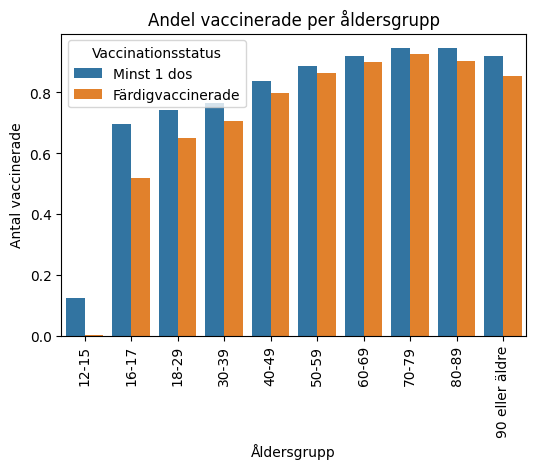

In [37]:
plt.figure(dpi=100)
plot1 = sns.barplot(data=vaccination_age, x="Åldersgrupp", y="Andel vaccinerade", hue="Vaccinationsstatus")
_ = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Antal vaccinerade")
_ = plot1.set_title("Andel vaccinerade per åldersgrupp")

### KPI 6. The number of covid-19 cases (per 10,000 inhabitants) should not differ significantly between the different neighbourhoods in Gothenburg.

- On a more local level
- We would like to have a low spread of the virus in all of the neighbourhoods in Göteborg, and in the best of worlds, it should not matter in which neighbourhood we live in. 


In [10]:
number_cases_neighbourhood = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=7, usecols=[0, 1, 3, 4, 6])
number_cases_neighbourhood

,år,veckonummer,KnNamn,Stadsdel,tot_antal_fall_per10000inv
0,2020,1,Ale,NaN,0.0
1,2020,2,Ale,NaN,0.0
2,2020,3,Ale,NaN,0.0
3,2020,4,Ale,NaN,0.0
4,2020,5,Ale,NaN,0.0
...,...,...,...,...,...
30169,2021,37,Övertorneå,NaN,550.0
30170,2021,38,Övertorneå,NaN,555.0
30171,2021,39,Övertorneå,NaN,555.0
30172,2021,40,Övertorneå,NaN,557.0


In [105]:
number_cases_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30174 entries, 0 to 30173
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   år                          30174 non-null  int64  
 1   veckonummer                 30174 non-null  int64  
 2   KnNamn                      30174 non-null  object 
 3   Stadsdel                    3196 non-null   object 
 4   tot_antal_fall_per10000inv  27802 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [11]:
number_cases_neighbourhood = number_cases_neighbourhood.loc[(number_cases_neighbourhood["KnNamn"] == "Göteborg") 
                            & (number_cases_neighbourhood["veckonummer"] == 41) & 
                            (number_cases_neighbourhood["år"] == 2021)].reset_index(drop=True)
number_cases_neighbourhood 

,år,veckonummer,KnNamn,Stadsdel,tot_antal_fall_per10000inv
0,2021,41,Göteborg,Angered,1311.0
1,2021,41,Göteborg,Askim-Frölunda-Högsbo,1250.0
2,2021,41,Göteborg,Centrum,1220.0
3,2021,41,Göteborg,Lundby,1261.0
4,2021,41,Göteborg,Majorna-Linné,1291.0
5,2021,41,Göteborg,Norra Hisingen,1329.0
6,2021,41,Göteborg,Västra Göteborg,1340.0
7,2021,41,Göteborg,Västra Hisingen,1319.0
8,2021,41,Göteborg,Örgryte-Härlanda,1331.0
9,2021,41,Göteborg,Östra Göteborg,1249.0


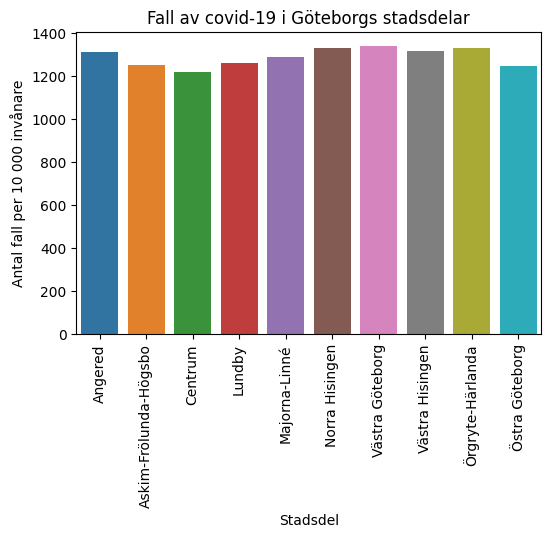

In [16]:
plt.figure(dpi=100)
plot1 = sns.barplot(data=number_cases_neighbourhood, x="Stadsdel", y="tot_antal_fall_per10000inv")
_ = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Antal fall per 10 000 invånare")
_ = plot1.set_title("Fall av covid-19 i Göteborgs stadsdelar")

## Exercise 4

In this part I will explore data on covid-19 globally, with data from ECDC and WHO.

### 4.1 Something I wanted to explore when I examined the KPI:s is the number of cases per age group and week. 

In [38]:
cases_age = pd.read_excel("data/new_cases_weekly_per_age.xlsx")
cases_age.head()

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
0,Austria,AT,2020-01,<15yr,NaN,1283060,NaN,TESSy COVID-19
1,Austria,AT,2020-02,<15yr,NaN,1283060,NaN,TESSy COVID-19
2,Austria,AT,2020-03,<15yr,NaN,1283060,NaN,TESSy COVID-19
3,Austria,AT,2020-04,<15yr,NaN,1283060,NaN,TESSy COVID-19
4,Austria,AT,2020-05,<15yr,NaN,1283060,NaN,TESSy COVID-19


In [39]:
cases_age.info() #There are some missing values for new_cases and rate_14_day_per_100k

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               17100 non-null  object 
 1   country_code          17100 non-null  object 
 2   year_week             17100 non-null  object 
 3   age_group             17100 non-null  object 
 4   new_cases             14824 non-null  float64
 5   population            17100 non-null  int64  
 6   rate_14_day_per_100k  14590 non-null  float64
 7   source                17100 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.0+ MB


In [40]:
cases_age["country"].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

In [41]:
cases_age_swe = cases_age[cases_age["country"] == "Sweden"].reset_index(drop=True)
cases_age_swe

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
0,Sweden,SE,2020-01,<15yr,NaN,1834821,NaN,TESSy COVID-19
1,Sweden,SE,2020-02,<15yr,NaN,1834821,NaN,TESSy COVID-19
2,Sweden,SE,2020-03,<15yr,NaN,1834821,NaN,TESSy COVID-19
3,Sweden,SE,2020-04,<15yr,NaN,1834821,NaN,TESSy COVID-19
4,Sweden,SE,2020-05,<15yr,NaN,1834821,NaN,TESSy COVID-19
...,...,...,...,...,...,...,...,...
565,Sweden,SE,2021-38,80+yr,146.0,536306,56.684057,TESSy COVID-19
566,Sweden,SE,2021-39,80+yr,164.0,536306,57.802822,TESSy COVID-19
567,Sweden,SE,2021-40,80+yr,131.0,536306,55.005911,TESSy COVID-19
568,Sweden,SE,2021-41,80+yr,104.0,536306,43.818268,TESSy COVID-19


In [42]:
cases_age_swe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               570 non-null    object 
 1   country_code          570 non-null    object 
 2   year_week             570 non-null    object 
 3   age_group             570 non-null    object 
 4   new_cases             528 non-null    float64
 5   population            570 non-null    int64  
 6   rate_14_day_per_100k  516 non-null    float64
 7   source                570 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.8+ KB


In [43]:
#NaN values are found in the weeks 2020-01 to 2020-08 for all of the ages (except for week 6)
cases_age_swe[cases_age_swe["new_cases"].isna()]

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
0,Sweden,SE,2020-01,<15yr,NaN,1834821,NaN,TESSy COVID-19
1,Sweden,SE,2020-02,<15yr,NaN,1834821,NaN,TESSy COVID-19
2,Sweden,SE,2020-03,<15yr,NaN,1834821,NaN,TESSy COVID-19
3,Sweden,SE,2020-04,<15yr,NaN,1834821,NaN,TESSy COVID-19
4,Sweden,SE,2020-05,<15yr,NaN,1834821,NaN,TESSy COVID-19
6,Sweden,SE,2020-07,<15yr,NaN,1834821,NaN,TESSy COVID-19
7,Sweden,SE,2020-08,<15yr,NaN,1834821,NaN,TESSy COVID-19
95,Sweden,SE,2020-01,15-24yr,NaN,1156608,NaN,TESSy COVID-19
96,Sweden,SE,2020-02,15-24yr,NaN,1156608,NaN,TESSy COVID-19
97,Sweden,SE,2020-03,15-24yr,NaN,1156608,NaN,TESSy COVID-19


In [45]:
#For week 6 there is one case for the age 15-24 years old
cases_age_swe[cases_age_swe["year_week"] == "2020-06"]

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
5,Sweden,SE,2020-06,<15yr,0.0,1834821,NaN,TESSy COVID-19
100,Sweden,SE,2020-06,15-24yr,1.0,1156608,NaN,TESSy COVID-19
195,Sweden,SE,2020-06,25-49yr,0.0,3404540,NaN,TESSy COVID-19
290,Sweden,SE,2020-06,50-64yr,0.0,1866253,NaN,TESSy COVID-19
385,Sweden,SE,2020-06,65-79yr,0.0,1529061,NaN,TESSy COVID-19
480,Sweden,SE,2020-06,80+yr,0.0,536306,NaN,TESSy COVID-19


In [46]:
#I decide to remove the rows with missing values for new_cases (but keep week 6).
#The missing values are quite few and in the beginning of the pandemic, and therefore I argue that it is better to remove them, than trying to impute them
cases_age_swe = cases_age_swe.dropna(subset=["new_cases"]) #Drops all the NaN in the new_cases column, but NaN in the rate_14_day_per_100k are still there
cases_age_swe.isna().sum()

country                  0
country_code             0
year_week                0
age_group                0
new_cases                0
population               0
rate_14_day_per_100k    12
source                   0
dtype: int64

In [47]:
cases_age_swe[cases_age_swe["rate_14_day_per_100k"].isna()]

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
5,Sweden,SE,2020-06,<15yr,0.0,1834821,NaN,TESSy COVID-19
8,Sweden,SE,2020-09,<15yr,0.0,1834821,NaN,TESSy COVID-19
100,Sweden,SE,2020-06,15-24yr,1.0,1156608,NaN,TESSy COVID-19
103,Sweden,SE,2020-09,15-24yr,2.0,1156608,NaN,TESSy COVID-19
195,Sweden,SE,2020-06,25-49yr,0.0,3404540,NaN,TESSy COVID-19
198,Sweden,SE,2020-09,25-49yr,7.0,3404540,NaN,TESSy COVID-19
290,Sweden,SE,2020-06,50-64yr,0.0,1866253,NaN,TESSy COVID-19
293,Sweden,SE,2020-09,50-64yr,4.0,1866253,NaN,TESSy COVID-19
385,Sweden,SE,2020-06,65-79yr,0.0,1529061,NaN,TESSy COVID-19
388,Sweden,SE,2020-09,65-79yr,0.0,1529061,NaN,TESSy COVID-19


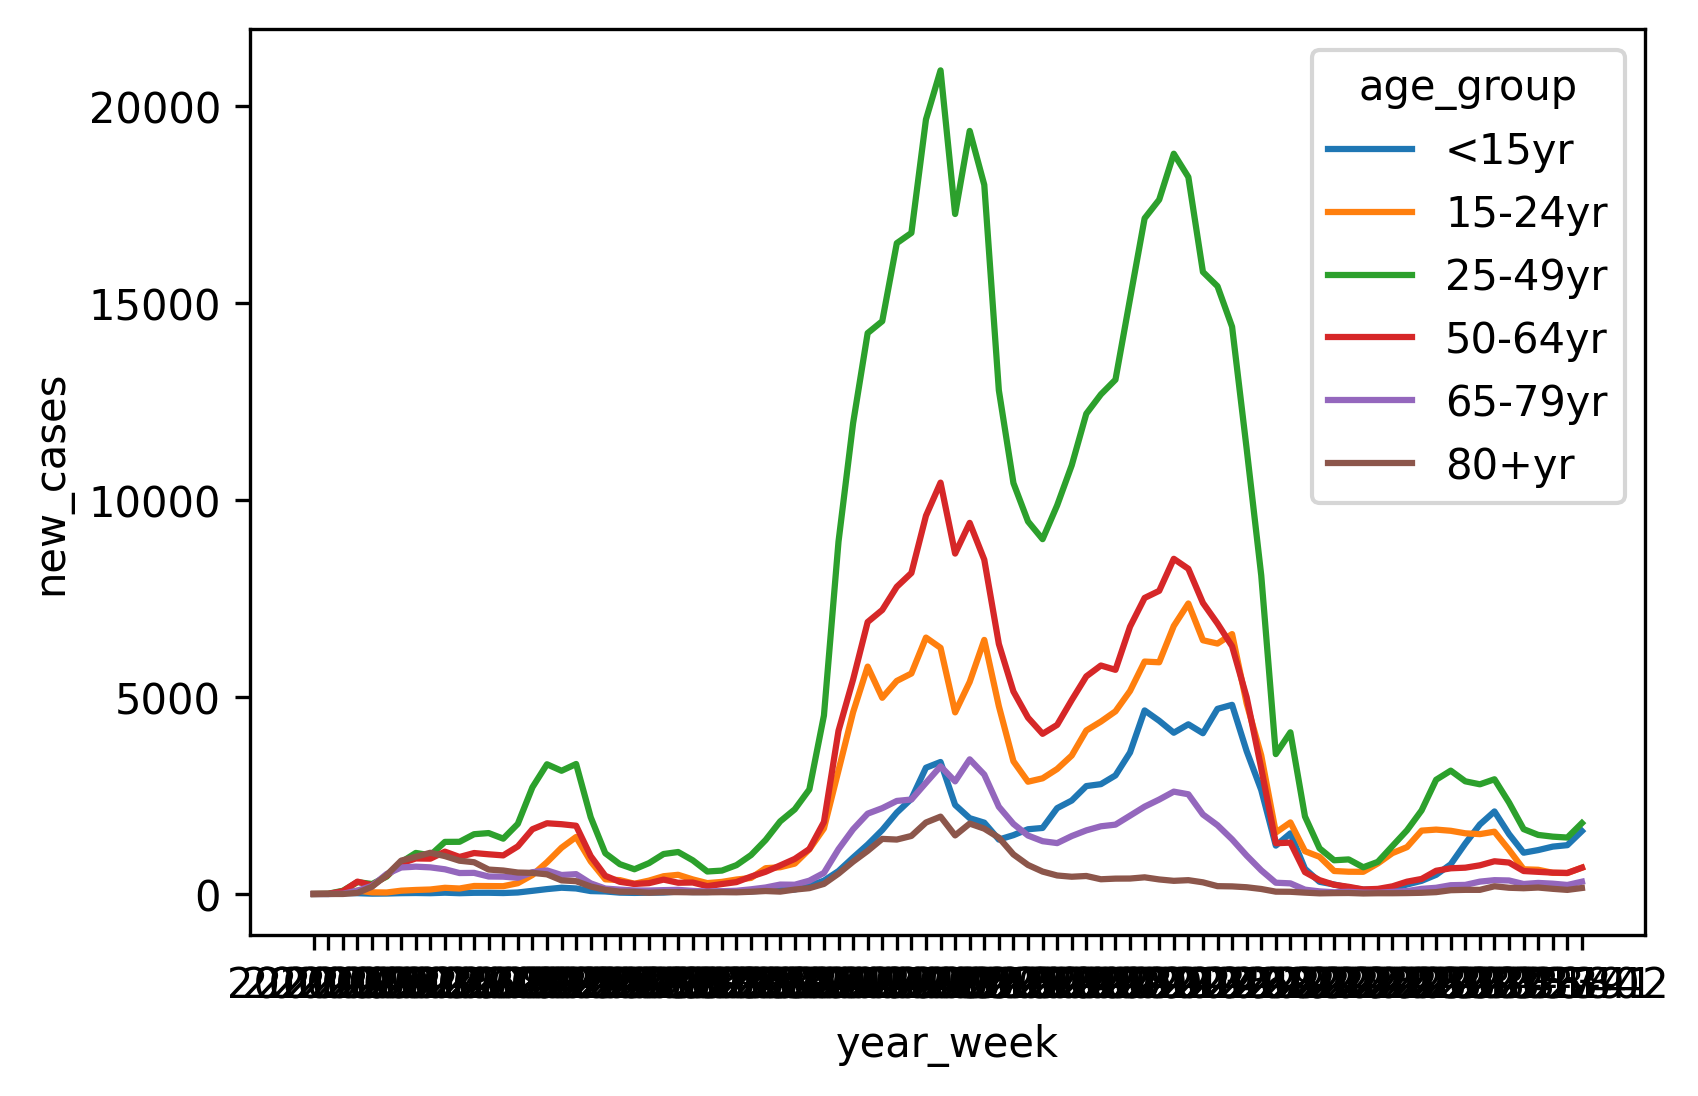

In [53]:
plt.figure(dpi=300)
plot = sns.lineplot(data=cases_age_swe, x="year_week", y="new_cases", hue="age_group")

In [54]:
cases_age_swe_no_NaN = cases_age_swe.dropna()

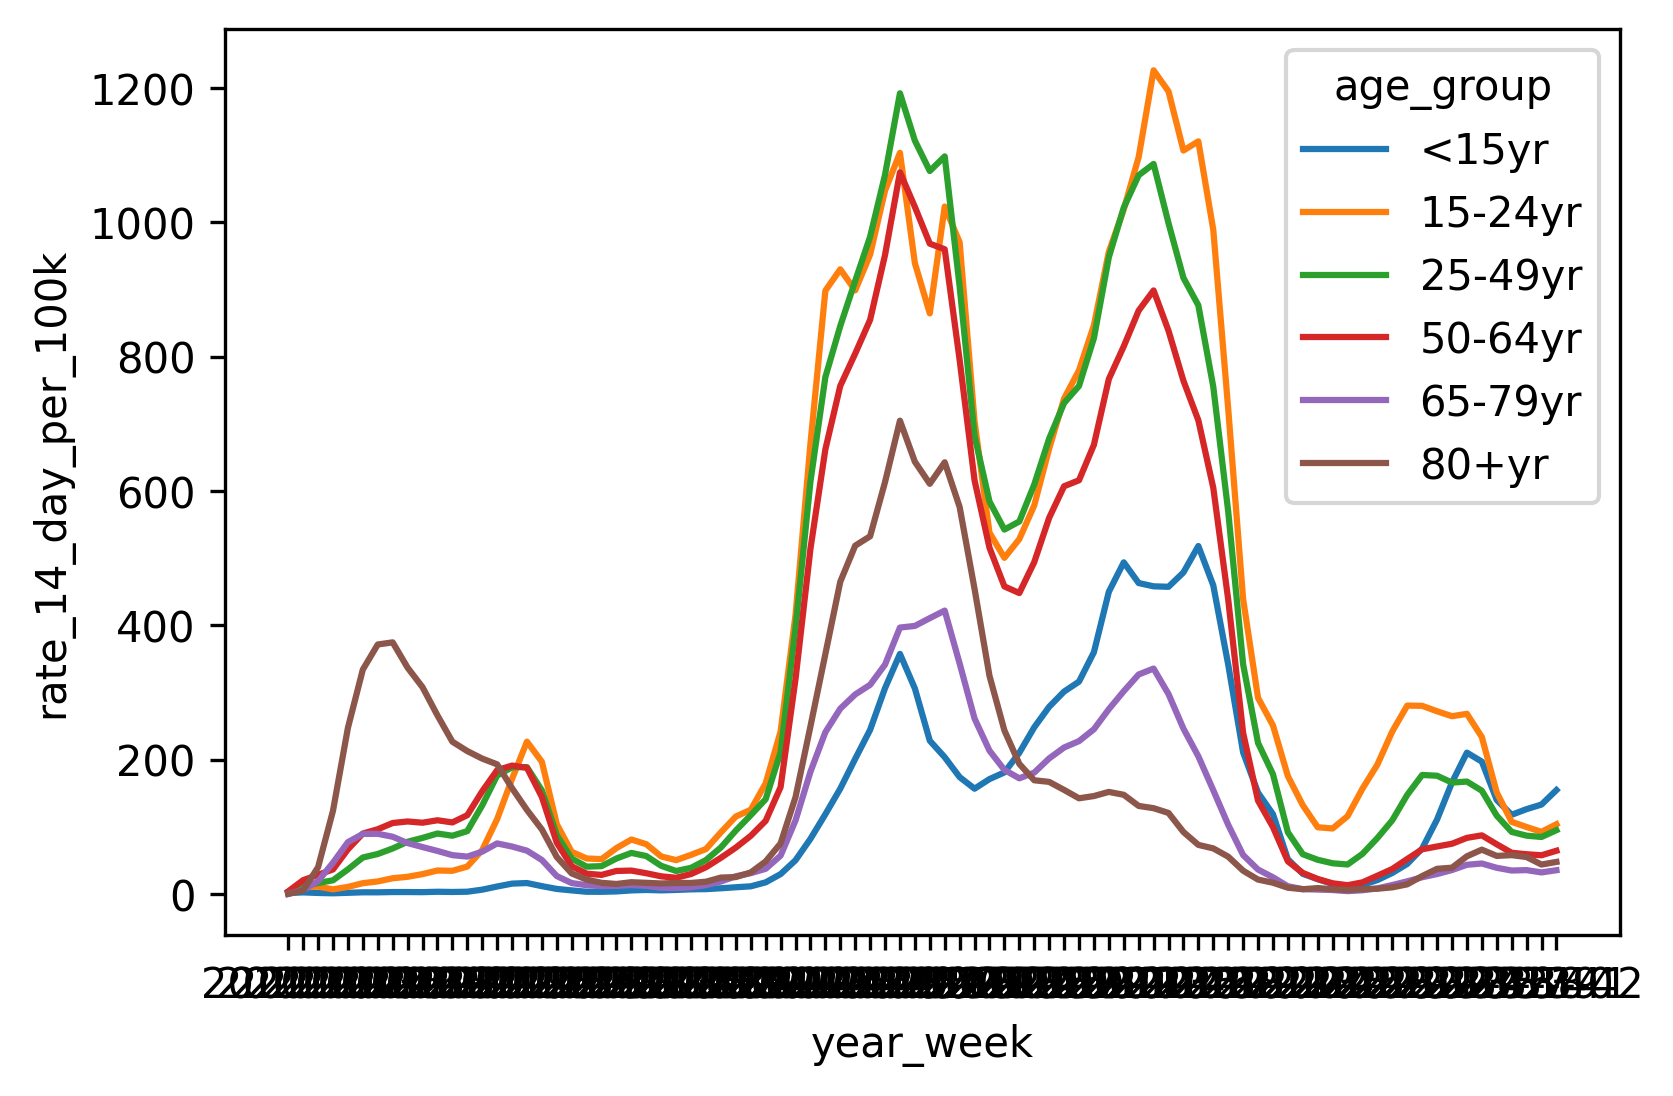

In [55]:
plt.figure(dpi=300)
plot = sns.lineplot(data=cases_age_swe_no_NaN, x="year_week", y="rate_14_day_per_100k", hue="age_group")

### 4.2 Positivity rate

In [72]:
testing_rate = pd.read_excel("data/testing_for_covid-19.xlsx")
testing_rate

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,national,AT,Austria,1838,12339,8901064.0,138.623877,14.895859,Manual webscraping
1,Austria,AT,2020-W16,national,AT,Austria,684,58488,8901064.0,657.089984,1.169471,Manual webscraping
2,Austria,AT,2020-W17,national,AT,Austria,448,33443,8901064.0,375.719128,1.339593,Manual webscraping
3,Austria,AT,2020-W18,national,AT,Austria,312,26598,8901064.0,298.818209,1.173021,Country website
4,Austria,AT,2020-W19,national,AT,Austria,264,42153,8901064.0,473.572598,0.626290,Country website
...,...,...,...,...,...,...,...,...,...,...,...,...
9421,Sweden,SE,2021-W38,national,SE,Sweden,4307,157544,10327589.0,1525.467367,2.733839,TESSy
9422,Sweden,SE,2021-W39,national,SE,Sweden,4240,138784,10327589.0,1343.818001,3.055107,TESSy
9423,Sweden,SE,2021-W40,national,SE,Sweden,4140,135532,10327589.0,1312.329528,3.054629,TESSy
9424,Sweden,SE,2021-W41,national,SE,Sweden,4075,139652,10327589.0,1352.222673,2.917968,TESSy


In [73]:
testing_rate.info() #8 missing values for positivity rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              9426 non-null   object 
 1   country_code         9426 non-null   object 
 2   year_week            9426 non-null   object 
 3   level                9426 non-null   object 
 4   region               9426 non-null   object 
 5   region_name          9426 non-null   object 
 6   new_cases            9426 non-null   int64  
 7   tests_done           9426 non-null   int64  
 8   population           9426 non-null   float64
 9   testing_rate         9426 non-null   float64
 10  positivity_rate      9418 non-null   float64
 11  testing_data_source  9426 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 883.8+ KB


In [74]:
testing_rate = testing_rate[testing_rate["level"] == "national"]
testing_rate.info() #Removed all of the subnational data, still 8 missing values for the positivity_rate

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 9425
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              2526 non-null   object 
 1   country_code         2526 non-null   object 
 2   year_week            2526 non-null   object 
 3   level                2526 non-null   object 
 4   region               2526 non-null   object 
 5   region_name          2526 non-null   object 
 6   new_cases            2526 non-null   int64  
 7   tests_done           2526 non-null   int64  
 8   population           2526 non-null   float64
 9   testing_rate         2526 non-null   float64
 10  positivity_rate      2518 non-null   float64
 11  testing_data_source  2526 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 256.5+ KB


In [75]:
#There is error in the data
#Positivity_rate is probably set to NaN because it cannot be calculate correctly
#For example Cyprus: 14/44 (tests_done/new_cases) results in a positivity rate of .31 (there are more new cases than tests done)
#Since this data only account for 8 rows I drop them entirely when plotting
testing_rate[testing_rate["positivity_rate"].isna()]

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
1055,Cyprus,CY,2020-W11,national,CY,Cyprus,44,14,888005.0,1.576568,NaN,Survey
7960,Romania,RO,2020-W12,national,RO,Romania,372,2,19328838.0,0.010347,NaN,TESSy
7961,Romania,RO,2020-W13,national,RO,Romania,1376,12,19328838.0,0.062083,NaN,TESSy
8062,Slovakia,SK,2020-W23,national,SK,Slovakia,9,2,5457873.0,0.036644,NaN,Country GitHub
8066,Slovakia,SK,2020-W27,national,SK,Slovakia,116,12,5457873.0,0.219866,NaN,Country GitHub
8074,Slovakia,SK,2020-W35,national,SK,Slovakia,492,46,5457873.0,0.842819,NaN,Country GitHub
8076,Slovakia,SK,2020-W37,national,SK,Slovakia,949,12,5457873.0,0.219866,NaN,Country GitHub
8079,Slovakia,SK,2020-W40,national,SK,Slovakia,4192,16,5457873.0,0.293154,NaN,Country GitHub


In [78]:
testing_rate_NaN_removed = testing_rate.dropna(subset=["positivity_rate"]) #Drops all the NaN in the new_cases column, but NaN in the rate_14_day_per_100k are still there
testing_rate_NaN_removed.isna().sum()

country                0
country_code           0
year_week              0
level                  0
region                 0
region_name            0
new_cases              0
tests_done             0
population             0
testing_rate           0
positivity_rate        0
testing_data_source    0
dtype: int64

In [77]:
testing_rate["country"].value_counts() #Not all weeks are included
#This is fine since we will use the mean value
#However Liechtenstein only have 14 values and therefore we should be careful with interpration

Finland          95
Ireland          91
Croatia          91
Czechia          91
Denmark          91
Slovakia         90
Malta            89
Estonia          89
Latvia           89
Italy            87
Norway           87
Luxembourg       87
Belgium          87
Portugal         87
Iceland          87
Greece           87
France           87
Slovenia         87
Germany          86
Lithuania        86
Poland           86
Hungary          86
Romania          85
Cyprus           85
Netherlands      85
Sweden           82
Austria          81
Spain            78
Bulgaria         73
Liechtenstein    14
Name: country, dtype: int64

In [85]:
testing_rate_mean = pd.DataFrame(testing_rate_NaN_removed["positivity_rate"].groupby(testing_rate_NaN_removed["region_name"]).mean()).reset_index()
testing_rate_mean

,region_name,positivity_rate
0,Austria,3.318560
1,Belgium,6.499421
2,Bulgaria,10.926536
3,Croatia,10.763938
4,Cyprus,3.478828
5,Czechia,6.175663
6,Denmark,1.340334
7,Estonia,6.722375
8,Finland,2.150379
9,France,5.808927


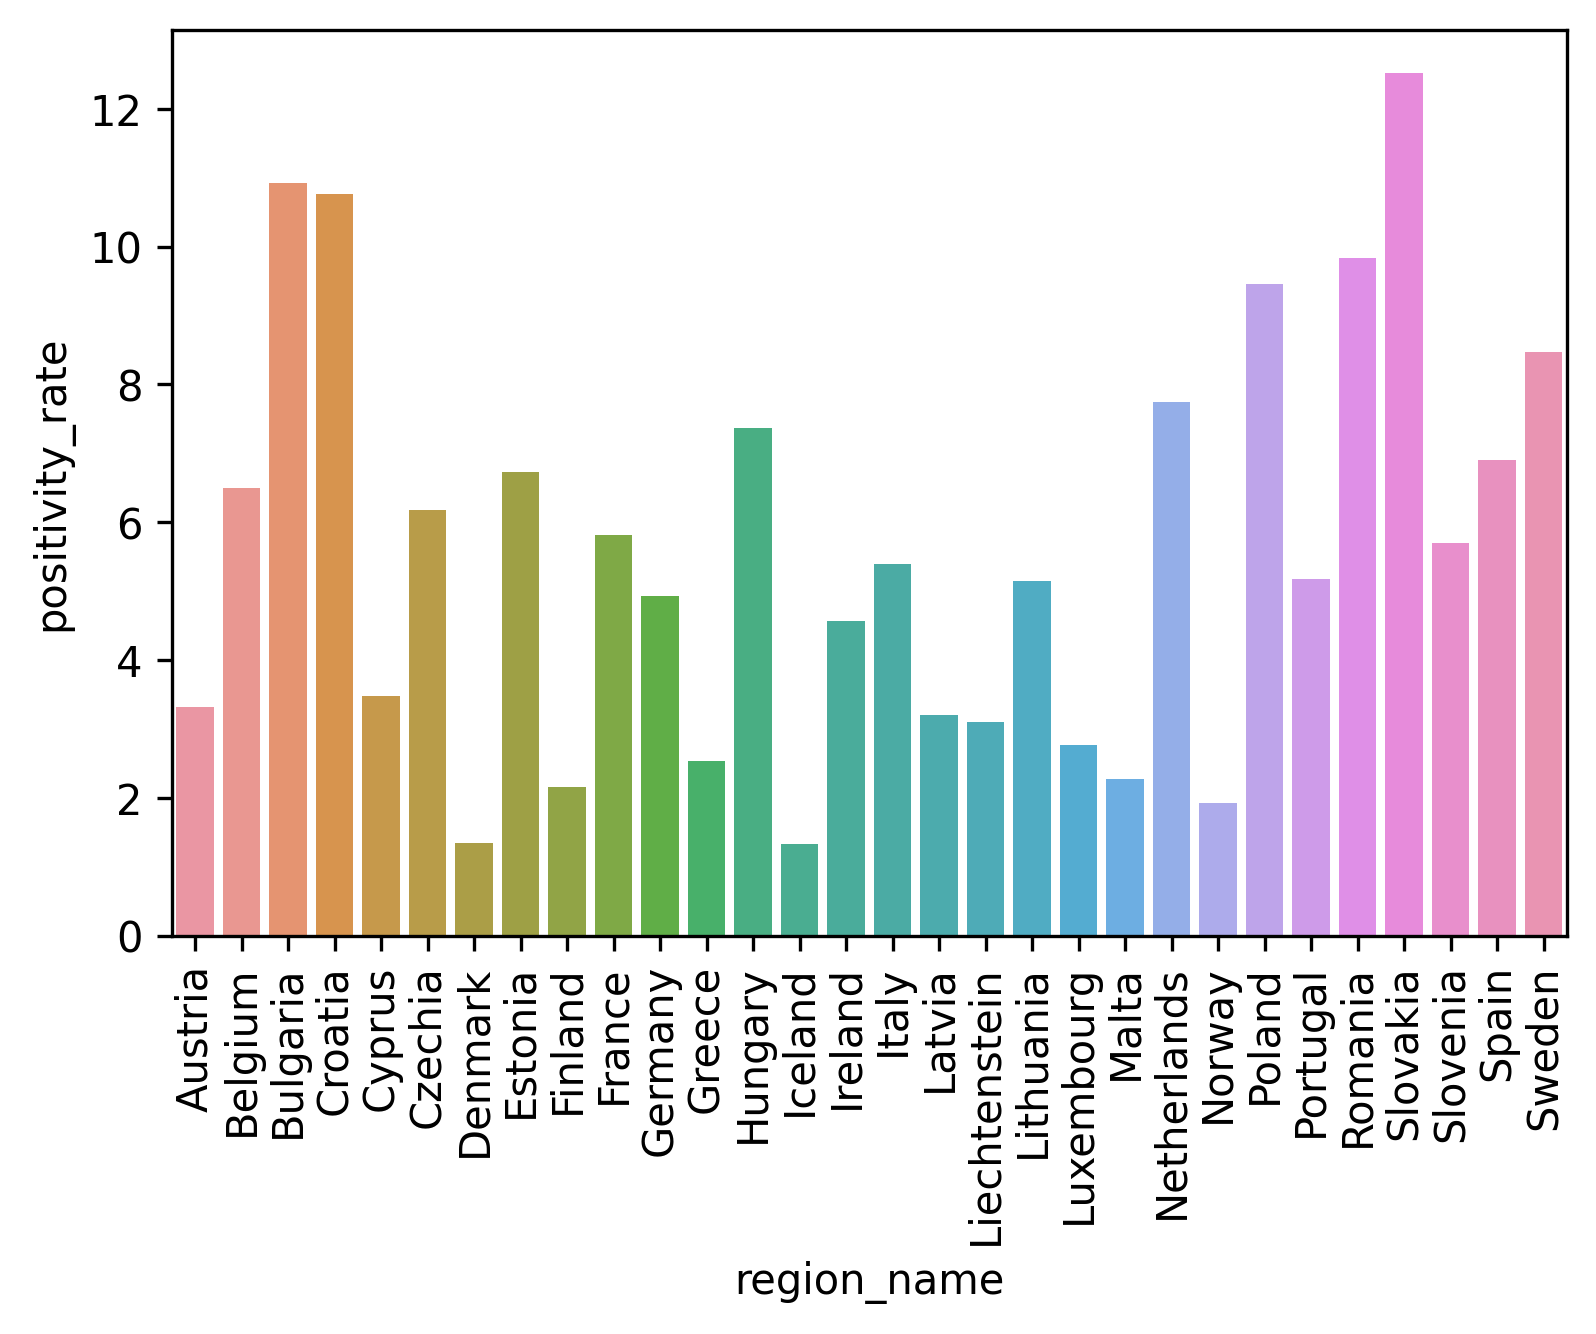

In [91]:
plt.figure(dpi=300)
fig = sns.barplot(data=testing_rate_mean, x="region_name", y="positivity_rate")
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

#Maybe add number of cases per 10000 

### 4.3 

In [2]:
covid_world = pd.read_excel("data/world_data.xlsx")

In [3]:
covid_world.info() #No missing values in weekly count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38552 entries, 0 to 38551
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           38552 non-null  object 
 1   country_code      37412 non-null  object 
 2   continent         38552 non-null  object 
 3   population        38552 non-null  int64  
 4   indicator         38552 non-null  object 
 5   weekly_count      38552 non-null  int64  
 6   year_week         38552 non-null  object 
 7   rate_14_day       38108 non-null  float64
 8   cumulative_count  38552 non-null  int64  
 9   source            38552 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.9+ MB


In [4]:
covid_world = covid_world[covid_world["indicator"] == "deaths"]
len(covid_world)

19276

In [6]:
covid_world["country"].value_counts()

Afghanistan                         95
Egypt                               95
Monaco                              95
Mexico                              95
Malta                               95
                                    ..
Marshall Islands                    52
Vanuatu                             50
Samoa                               48
Micronesia (Federated States Of)    42
Palau                               10
Name: country, Length: 222, dtype: int64

In [7]:
covid_world_total_death = covid_world[covid_world["year_week"] == "2021-42"]

In [8]:
covid_world_total_death["proportion_dead"] = (covid_world_total_death["cumulative_count"]/covid_world_total_death["population"])
covid_world_total_death

/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_1217/3457415646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_world_total_death["proportion_dead"] = (covid_world_total_death["cumulative_count"]/covid_world_total_death["population"])


,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,proportion_dead
189,Afghanistan,AFG,Asia,38928341,deaths,14,2021-42,0.744959,7257,Epidemic intelligence national data,0.000186
379,Africa (total),NaN,Africa,1339423921,deaths,1391,2021-42,2.160630,216840,Epidemic intelligence national data,0.000162
551,Albania,ALB,Europe,2845955,deaths,54,2021-42,37.245845,2874,Epidemic intelligence national data,0.001010
741,Algeria,DZA,Africa,43851043,deaths,20,2021-42,0.843766,5890,Epidemic intelligence national data,0.000134
931,America (total),NaN,America,1021703563,deaths,15982,2021-42,34.441497,2282980,Epidemic intelligence national data,0.002234
...,...,...,...,...,...,...,...,...,...,...,...
37895,Wallis And Futuna,WLF,Oceania,11246,deaths,0,2021-42,0.000000,7,Epidemic intelligence national data,0.000622
38053,Western Sahara,ESH,Africa,597330,deaths,0,2021-42,0.000000,1,Epidemic intelligence national data,0.000002
38215,Yemen,YEM,Asia,29825968,deaths,36,2021-42,2.078725,1840,Epidemic intelligence national data,0.000062
38383,Zambia,ZMB,Africa,18383956,deaths,1,2021-42,0.271976,3659,Epidemic intelligence national data,0.000199


In [25]:
covid_world_total_death["proportion_dead"] = covid_world_total_death["proportion_dead"]*100

/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_1217/2169088688.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
geo_data = open('data/custom.geo.json')
world_map = json.load(geo_data)

In [38]:
hover_template = '<br>Country: %{customdata[0]}<br>Proportion deceased: %{customdata[1]}<br><extra></extra>'

customdata=[covid_world_total_death["country"], covid_world_total_death["proportion_dead"]]

fig = px.choropleth_mapbox(
                        covid_world_total_death,
                        title="Proportion of population deceased in covid-19", 
                        geojson=world_map,
                        color="proportion_dead",
                        color_continuous_scale="Viridis",
                        locations="country_code", 
                        featureidkey="properties.iso_a3",
                        center={"lat": 60, "lon": 18},
                        mapbox_style="carto-positron", 
                        zoom=2,
                        opacity=0.8,
                        hover_name = "country",
                        labels={"proportion_dead":"Proportion deceased (%)"},
                        hover_data = {"country_code":False})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.write_html("Visualiseringar/covid19_map_death.html", auto_open=True)